In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
df=pd.read_excel('info_competitions.xlsx')

In [3]:
df.head()

,web-scraper-order,web-scraper-start-url,info
0,1560003043-449,https://www.kaggle.com/competitions,"<img alt=""Higgs Boson Machine Learning Challen..."
1,1560003043-485,https://www.kaggle.com/competitions,"<img alt=""See Click Predict Fix - Hackathon"" s..."
2,1560003043-298,https://www.kaggle.com/competitions,"<img alt=""TrackML Particle Tracking Challenge""..."
3,1560003043-419,https://www.kaggle.com/competitions,"<img alt=""Bag of Words Meets Bags of Popcorn"" ..."
4,1560003043-529,https://www.kaggle.com/competitions,"<img alt=""CHALEARN Gesture Challenge 2"" src=""h..."


In [4]:
dfinfo = list(df['info'])

In [5]:
len(dfinfo)

339

In [6]:
# En este codigo se parsea ese HTML y se extrae exactamente lo que se quiere. 
# Es como utilizar BeautifulSoup in python.
# Probar y ver mas información.

mydict = {}

lista = []

for i in range(len(dfinfo)):
    htmltxt = dfinfo[i]
    soup = BeautifulSoup(htmltxt, "html.parser")
    mydict = {}
    
    mydict["title"] = soup.a.text
    
    description = soup.find("p",{"class":"sc-bgSSUy ctliPp"})
    mydict["description"] = description.get_text()
        
    topic = soup.find_all("span")
    if topic != None:
        mydict["topic"] = soup.find("span").text
    else: 
        mydict["topic"] = None

    
    tags = soup.find("div", {"class":"sc-jKJlTe bkOCgj"})
    if tags != None:
        tags = soup.find("div", {"class":"sc-jKJlTe bkOCgj"})
        mydict["tags"]= tags.get_text()
    else: 
        mydict["tags"] = None
    
    mydict["prize"]= soup.find("p", {"class":"sc-bRZzSz bPSPVl"}).text
    
    mydict["teams"] = soup.find_all("span")[-1].text
    
    for link in soup.find_all('span'):
        if link.get('title') != None:
            mydict["date"] = link.get('title')
    
    lista.append(mydict)

In [7]:
competitions_info = pd.DataFrame(lista)

In [8]:
competitions_info

,date,description,prize,tags,teams,title,topic
0,Tue Sep 16 2014 01:59:00 GMT+0200 (hora de ver...,Use the ATLAS experiment to identify the Higgs...,"$13,000",None,"1,785 teams",Higgs Boson Machine Learning Challenge,Featured
1,Sun Sep 29 2013 03:00:00 GMT+0200 (hora de ver...,Predict which 311 issues are most important to...,"$1,000",None,80 teams,See Click Predict Fix - Hackathon,Featured
2,Tue Aug 14 2018 01:59:00 GMT+0200 (hora de ver...,High Energy Physics particle tracking in CERN ...,"$25,000","physics, tabular data",653 teams,TrackML Particle Tracking Challenge,Featured
3,Wed Jul 01 2015 01:59:00 GMT+0200 (hora de ver...,Use Google's Word2Vec for movie reviews,Knowledge,"film, text data, binary classification",578 teams,Bag of Words Meets Bags of Popcorn,Getting Started
4,Wed Sep 12 2012 01:59:00 GMT+0200 (hora de ver...,Develop a Gesture Recognizer for Microsoft Kin...,"$10,000",None,30 teams,CHALEARN Gesture Challenge 2,Research
5,Tue Oct 18 2011 01:59:59 GMT+0200 (hora de ver...,There's been a lot of recent work done in unsu...,$500,None,26 teams,Semi-Supervised Feature Learning,Featured
6,Sat Jun 08 2019 01:59:00 GMT+0200 (hora de ver...,Categorize animals in the wild,Kudos,"image data, multiclass classification",344 teams,iWildCam 2019 - FGVC6,Playground
7,Tue Mar 15 2016 00:59:00 GMT+0100 (hora estánd...,Transforming How We Diagnose Heart Disease,"$200,000","image data, healthcare",192 teams,Second Annual Data Science Bowl,Featured
8,Sat May 16 2015 01:59:00 GMT+0200 (hora de ver...,Predict probabilistic distribution of hourly r...,$500,tabular data,321 teams,How Much Did It Rain?,Research
9,Tue Nov 01 2016 00:59:00 GMT+0100 (hora estánd...,Does every painter leave a fingerprint?,Knowledge,"image data, painting, duplicate detection, obj...",41 teams,Painter by Numbers,Playground


In [9]:
competitions_info.shape

(339, 7)

In [9]:
competitions_info.loc[competitions_info.teams.str.contains("teams") == False, "teams"] = 0

In [10]:
competitions_info[competitions_info.teams == 0] 

,date,description,prize,tags,teams,title,topic
11,Tue Sep 29 2015 01:59:00 GMT+0200 (hora de ver...,Your code deserves better,Swag,None,0,Introducing Kaggle Scripts,Playground
65,Sat Jun 22 2019 01:59:00 GMT+0200 (hora de ver...,Help the City of Los Angeles to structure and ...,"$15,000","employment, nlp, text data, image data",0,Data Science for Good: City of Los Angeles,Analytics
73,Wed Apr 24 2019 01:59:00 GMT+0200 (hora de ver...,Match career advice questions with professiona...,"$15,000","children, education",0,Data Science for Good: CareerVillage.org,Analytics
102,Sun Jan 20 2013 08:59:00 GMT+0100 (hora estánd...,Using 3 years of school grading data supplied ...,"$5,000",None,0,Visualize the State of Public Education in Col...,Research
199,Sun Feb 26 2012 01:00:00 GMT+0100 (hora estánd...,Create a forum for New Users,"$10,000",None,0,Getting Started,Featured
221,Fri Jun 11 2010 15:29:00 GMT+0200 (hora de ver...,Quants at Goldman Sachs and JP Morgan have mod...,$100,None,0,World Cup 2010 - Take on the Quants,Featured
225,Sat Apr 04 2015 02:02:14 GMT+0200 (hora de ver...,Test your analytics skills by predicting which...,Knowledge,None,0,15.071x - The Analytics Edge (Spring 2015),Research
244,Wed Mar 27 2013 04:59:00 GMT+0100 (hora estánd...,Can we objectively measure the symptoms of Par...,"$10,000",None,0,Predicting Parkinson's Disease Progression wit...,Research
277,Thu Jan 10 2019 00:59:00 GMT+0100 (hora estánd...,Analyze NFL game data and suggest rules to imp...,"$80,000","health, american football, sports, safety",0,NFL Punt Analytics Competition,Analytics
337,Fri Feb 08 2013 01:00:00 GMT+0100 (hora estánd...,Provide creative visualizations of the Kaggle ...,$900,None,0,Leaping Leaderboard Leapfrogs,Research


In [11]:
competitions_info.to_csv("Dt_competitions_info.csv")

Descripción del Dataframe:

-date: Día en que la competición finaliza.

-description: Información sobre la competición. Descripción de la competición.

-num_teams: Número de equipos participantes en cada una de las competiciones.

-prize: Premio asignado a cada una de las competiciones.

-tags: Diferentes etiquetas dentro de las que se puede encuadrar cada competición(https://www.kaggle.com/tags)

-title: Título/Nombre con el que se publica la competición.

-topic: Tipo de competición(descrito en el TFM)


In [12]:
df = competitions_info[competitions_info.teams != 0]

In [13]:
df.head()

,date,description,prize,tags,teams,title,topic
0,Tue Sep 16 2014 01:59:00 GMT+0200 (hora de ver...,Use the ATLAS experiment to identify the Higgs...,"$13,000",None,"1,785 teams",Higgs Boson Machine Learning Challenge,Featured
1,Sun Sep 29 2013 03:00:00 GMT+0200 (hora de ver...,Predict which 311 issues are most important to...,"$1,000",None,80 teams,See Click Predict Fix - Hackathon,Featured
2,Tue Aug 14 2018 01:59:00 GMT+0200 (hora de ver...,High Energy Physics particle tracking in CERN ...,"$25,000","physics, tabular data",653 teams,TrackML Particle Tracking Challenge,Featured
3,Wed Jul 01 2015 01:59:00 GMT+0200 (hora de ver...,Use Google's Word2Vec for movie reviews,Knowledge,"film, text data, binary classification",578 teams,Bag of Words Meets Bags of Popcorn,Getting Started
4,Wed Sep 12 2012 01:59:00 GMT+0200 (hora de ver...,Develop a Gesture Recognizer for Microsoft Kin...,"$10,000",None,30 teams,CHALEARN Gesture Challenge 2,Research


Limpiamos datos de 'teams', elimnado las filas que contienen un valor=0. Y pasamos los datos a int.

In [14]:
df['teams'] = df['teams'].map(lambda x: x.rstrip('teams'))

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
df.head()

,date,description,prize,tags,teams,title,topic
0,Tue Sep 16 2014 01:59:00 GMT+0200 (hora de ver...,Use the ATLAS experiment to identify the Higgs...,"$13,000",None,"1,785",Higgs Boson Machine Learning Challenge,Featured
1,Sun Sep 29 2013 03:00:00 GMT+0200 (hora de ver...,Predict which 311 issues are most important to...,"$1,000",None,80,See Click Predict Fix - Hackathon,Featured
2,Tue Aug 14 2018 01:59:00 GMT+0200 (hora de ver...,High Energy Physics particle tracking in CERN ...,"$25,000","physics, tabular data",653,TrackML Particle Tracking Challenge,Featured
3,Wed Jul 01 2015 01:59:00 GMT+0200 (hora de ver...,Use Google's Word2Vec for movie reviews,Knowledge,"film, text data, binary classification",578,Bag of Words Meets Bags of Popcorn,Getting Started
4,Wed Sep 12 2012 01:59:00 GMT+0200 (hora de ver...,Develop a Gesture Recognizer for Microsoft Kin...,"$10,000",None,30,CHALEARN Gesture Challenge 2,Research


In [16]:
df.dtypes

date           object
description    object
prize          object
tags           object
teams          object
title          object
topic          object
dtype: object

In [17]:
df['teams'] = df.apply(lambda x: int(x['teams'].replace(',', '')),axis=1)

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
df.dtypes

date           object
description    object
prize          object
tags           object
teams           int64
title          object
topic          object
dtype: object

In [19]:
df.head()

,date,description,prize,tags,teams,title,topic
0,Tue Sep 16 2014 01:59:00 GMT+0200 (hora de ver...,Use the ATLAS experiment to identify the Higgs...,"$13,000",None,1785,Higgs Boson Machine Learning Challenge,Featured
1,Sun Sep 29 2013 03:00:00 GMT+0200 (hora de ver...,Predict which 311 issues are most important to...,"$1,000",None,80,See Click Predict Fix - Hackathon,Featured
2,Tue Aug 14 2018 01:59:00 GMT+0200 (hora de ver...,High Energy Physics particle tracking in CERN ...,"$25,000","physics, tabular data",653,TrackML Particle Tracking Challenge,Featured
3,Wed Jul 01 2015 01:59:00 GMT+0200 (hora de ver...,Use Google's Word2Vec for movie reviews,Knowledge,"film, text data, binary classification",578,Bag of Words Meets Bags of Popcorn,Getting Started
4,Wed Sep 12 2012 01:59:00 GMT+0200 (hora de ver...,Develop a Gesture Recognizer for Microsoft Kin...,"$10,000",None,30,CHALEARN Gesture Challenge 2,Research


A continuación trabajamos de forma similar sobre la columna 'prize'. Vamos a tomar los datos que tengan un valor económico y limpiamos los datos para que queden en tipo numérico. A los que no tienen precio asignado se le asigna un valor = 0 para evitar la perdida de más datos.

In [20]:
df.prize.unique()

array(['$13,000', '$1,000', '$25,000', 'Knowledge', '$10,000', '$500',
       'Kudos', '$200,000', '$5,000', '$7,500', 'Jobs', '$40,000',
       '$100,000', '$2,500', '$50,000', '$950', '$8,000', '$30,000',
       '$175,000', '$16,000', '$15,000', '$20,000', 'USD', '$1,500,000',
       '$3,000', '$18,500', '$35,000', 'Swag', '$2,000', '$500,000',
       '$7,030', '$4,000', '$250', '$150,000', '$9,000', '$1,200,000',
       '$45,000', '$70,000', '$80,000', '$65,000', '$60,000', '$75,000',
       '$6,000', '$617', '$1,800', '$680', '$17,500', '$1,000,000',
       '$100', '$600', '$125,000', '$8,500', '€5,000', '$22,500',
       '$2,350', '$0', '$37,000', '$150'], dtype=object)

In [21]:
#Los valores 'USD' corresponden a compteciones que no especifican la cuantía económica del premio.
df[(df['prize'] == 'USD')]

,date,description,prize,tags,teams,title,topic
48,Wed Dec 12 2012 01:00:00 GMT+0100 (hora estánd...,Predict which of our current customers will st...,USD,None,12,Will I Stay or Will I Go?,Masters
302,Mon Feb 04 2013 01:00:00 GMT+0100 (hora estánd...,Predict future prescription volume,USD,None,12,Prescription Volume Prediction,Masters


En ambas competiciones no se especifica el premio tal y como podemos comprobar en https://www.kaggle.com/c/RxVolumePrediction/overview/prizes y https://www.kaggle.com/c/customer-retention/overview/prizes. Por lo tanto decidimos dejar ambos premios con valor '0', ya que desconocemos la cuantía. Además también se podrán a '0' aquellos datos como Knowledge, Kudos, Swag y Jobs ya que no tienen un premio asignado. Para ello:

In [22]:
df.loc[df['prize'] == 'USD', 'prize'] = '$0'
df.loc[df['prize'] == 'Knowledge', 'prize'] = '$0'
df.loc[df['prize'] == 'Swag', 'prize'] = '$0'
df.loc[df['prize'] == 'Kudos', 'prize'] = '$0'
df.loc[df['prize'] == 'Jobs', 'prize'] = '$0'

C:\Users\Usuario\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [23]:
#Eliminamos el símbolo del $ en la columna 'prize'
df['prize'] = df['prize'].map(lambda x: x.lstrip('$'))

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
#Eliminamos el símbolo del $ en la columna 'prize'
df['prize'] = df['prize'].map(lambda x: x.lstrip('€'))

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
#Y cambiamos los datos a int 
df['prize'] = df.apply(lambda x: int(x['prize'].replace(',', '')),axis=1)

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
df.dtypes

date           object
description    object
prize           int64
tags           object
teams           int64
title          object
topic          object
dtype: object

Continuamos limpiando la columna 'date'. 

In [27]:
#DATE
df['date'] = df['date'].str[4:25]

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
df.head()

,date,description,prize,tags,teams,title,topic
0,Sep 16 2014 01:59:00,Use the ATLAS experiment to identify the Higgs...,13000,None,1785,Higgs Boson Machine Learning Challenge,Featured
1,Sep 29 2013 03:00:00,Predict which 311 issues are most important to...,1000,None,80,See Click Predict Fix - Hackathon,Featured
2,Aug 14 2018 01:59:00,High Energy Physics particle tracking in CERN ...,25000,"physics, tabular data",653,TrackML Particle Tracking Challenge,Featured
3,Jul 01 2015 01:59:00,Use Google's Word2Vec for movie reviews,0,"film, text data, binary classification",578,Bag of Words Meets Bags of Popcorn,Getting Started
4,Sep 12 2012 01:59:00,Develop a Gesture Recognizer for Microsoft Kin...,10000,None,30,CHALEARN Gesture Challenge 2,Research


In [29]:
df.date.unique()

array(['Sep 16 2014 01:59:00 ', 'Sep 29 2013 03:00:00 ',
       'Aug 14 2018 01:59:00 ', 'Jul 01 2015 01:59:00 ',
       'Sep 12 2012 01:59:00 ', 'Oct 18 2011 01:59:59 ',
       'Jun 08 2019 01:59:00 ', 'Mar 15 2016 00:59:00 ',
       'May 16 2015 01:59:00 ', 'Nov 01 2016 00:59:00 ',
       'May 12 2013 01:00:00 ', 'Apr 11 2012 01:59:59 ',
       'Oct 31 2012 01:00:00 ', 'Jun 27 2013 01:59:00 ',
       'Jun 09 2015 01:59:00 ', 'Oct 17 2012 01:59:00 ',
       'Nov 25 2013 00:59:00 ', 'Aug 02 2010 14:32:00 ',
       'Jan 01 2015 00:59:00 ', 'Dec 01 2015 00:59:00 ',
       'May 31 2018 01:59:00 ', 'Aug 10 2012 01:59:59 ',
       'Nov 21 2011 00:59:59 ', 'Dec 28 2015 00:59:00 ',
       'Jun 07 2016 01:59:00 ', 'Feb 27 2019 00:59:00 ',
       'Jan 11 2011 23:00:00 ', 'Jun 02 2012 01:59:59 ',
       'Jun 04 2019 01:59:00 ', 'Feb 16 2016 00:59:00 ',
       'Jun 11 2019 01:59:00 ', 'Mar 17 2015 00:59:00 ', 'ing',
       'Apr 21 2013 01:59:00 ', 'Apr 05 2014 01:59:00 ',
       'Jul 09 2019 01:5

Hay datos que tiene valor 'ing'. Modificamos este valor a una fecha concreta. Corresponde a competiciones que no tienen fecha de finalización por lo que se asigna una fecha futura.

In [30]:
#Cambiamos los datos incorrectos con una fecha concreta.
df.loc[df['date'] == 'ing', 'date'] = 'Dec 31 2100 23:59:00'

C:\Users\Usuario\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [32]:
df['date'] = df['date'].str[:11]
df['time'] = df['date'].str[12:]

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [33]:
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'])

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
df.head()

,date,description,prize,tags,teams,title,topic,time
0,2014-09-16,Use the ATLAS experiment to identify the Higgs...,13000,None,1785,Higgs Boson Machine Learning Challenge,Featured,NaT
1,2013-09-29,Predict which 311 issues are most important to...,1000,None,80,See Click Predict Fix - Hackathon,Featured,NaT
2,2018-08-14,High Energy Physics particle tracking in CERN ...,25000,"physics, tabular data",653,TrackML Particle Tracking Challenge,Featured,NaT
3,2015-07-01,Use Google's Word2Vec for movie reviews,0,"film, text data, binary classification",578,Bag of Words Meets Bags of Popcorn,Getting Started,NaT
4,2012-09-12,Develop a Gesture Recognizer for Microsoft Kin...,10000,None,30,CHALEARN Gesture Challenge 2,Research,NaT


In [35]:
df.dtypes

date           datetime64[ns]
description            object
prize                   int64
tags                   object
teams                   int64
title                  object
topic                  object
time           datetime64[ns]
dtype: object

In [36]:
df=df.drop(['time'], axis=1)

In [37]:
df.head()

,date,description,prize,tags,teams,title,topic
0,2014-09-16,Use the ATLAS experiment to identify the Higgs...,13000,None,1785,Higgs Boson Machine Learning Challenge,Featured
1,2013-09-29,Predict which 311 issues are most important to...,1000,None,80,See Click Predict Fix - Hackathon,Featured
2,2018-08-14,High Energy Physics particle tracking in CERN ...,25000,"physics, tabular data",653,TrackML Particle Tracking Challenge,Featured
3,2015-07-01,Use Google's Word2Vec for movie reviews,0,"film, text data, binary classification",578,Bag of Words Meets Bags of Popcorn,Getting Started
4,2012-09-12,Develop a Gesture Recognizer for Microsoft Kin...,10000,None,30,CHALEARN Gesture Challenge 2,Research


In [38]:
df.shape

(329, 7)

In [39]:
df.to_csv('Competitions_limpio.csv')

## Análisis por topic

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df.topic.unique()

array(['Featured', 'Getting Started', 'Research', 'Playground',
       'Recruitment', 'Masters'], dtype=object)

In [44]:
# separamos por topic
featured = df[df.topic == 'Featured']
research = df[df.topic == 'Research']
masters = df[df.topic == 'Masters']
analytics = df[df.topic == 'Analytics']
playground = df[df.topic == 'Playground']
recruitment = df[df.topic == 'Recruitment']

AttributeError: 'str' object has no attribute 'shape'

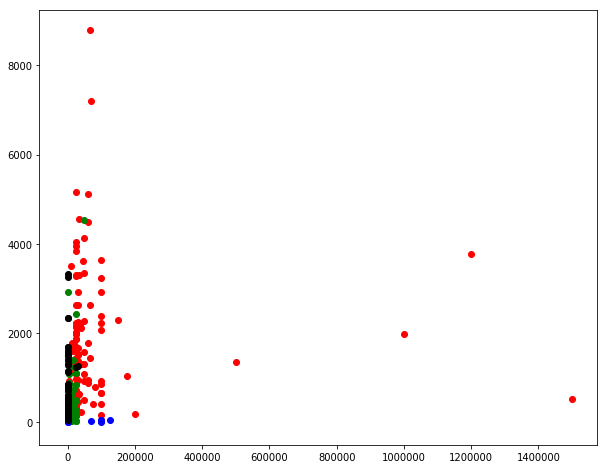

In [46]:
plt.figure(figsize=(10, 8))
plt.scatter(featured['prize'], featured['teams'], 
            c='red', label='featured')
plt.scatter(research['prize'], research['teams'], 
            c='green', label='research')
plt.scatter(masters['prize'], masters['teams'], 
            c='blue', label='masters')
plt.scatter(analytics['prize'], analytics['teams'], 
            c='brown', label='analytics')
plt.scatter(playground['prize'], playground['teams'], 
            c='black', label='playground')
plt.scatter(recruitment['prize'], recruitment['teams'], 
            c='yelow', label='recruitment')


plt.title('Equipos según premio de la competición')
plt.xlabel('Premio')
plt.ylabel('Número de equipos')
plt.legend(loc='upper right')
plt.show()